In [1]:
import pandas as pd

df_cab = pd.read_csv("C:/Users/tkrhk/Desktop/cab_rides.csv")
df_weather = pd.read_csv("C:/Users/tkrhk/Desktop/weather.csv")

In [2]:
df_cab.value_counts("destination")

destination
Financial District         58851
Theatre District           57798
Back Bay                   57780
Boston University          57764
Haymarket Square           57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
dtype: int64

In [3]:
df_weather.value_counts("location")

location
Back Bay                   523
Beacon Hill                523
Boston University          523
Fenway                     523
Financial District         523
Haymarket Square           523
North End                  523
North Station              523
Northeastern University    523
South Station              523
Theatre District           523
West End                   523
dtype: int64

In [4]:
df_cab.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [6]:
df_cab['price'] = df_cab['price'].fillna(df_cab['price'].median())

In [7]:
df_cab.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,693071.000000,693071.000000
mean,2.189430,1.544046e+12,16.303056,1.013870
std,1.138937,6.891925e+08,8.983913,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.500000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


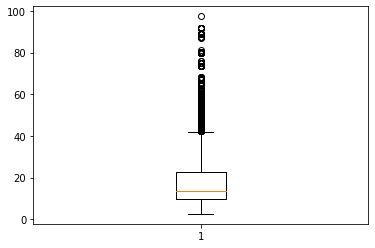

In [8]:
import matplotlib.pyplot as plt

plt.boxplot(df_cab["price"])
plt.show()

In [9]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [10]:
df_weather['rain'] = df_weather['rain'].fillna(0)

In [11]:
df_weather['rain']

0       0.1228
1       0.1846
2       0.1089
3       0.0969
4       0.1786
         ...  
6271    0.0000
6272    0.0000
6273    0.0000
6274    0.0000
6275    0.0000
Name: rain, Length: 6276, dtype: float64

In [12]:
df_cab.rename(columns= {'distance':'cab_distance', 
                        'time_stamp': 'cab_time_stamp',
                        'destination': 'location', 
                        'source': 'cab_source',
                        'price': 'cab_price',
                        'surge_multiplier': 'cab_surge_multiplier',
                        'id': 'cab_id',
                        'product_id': 'cab_product_id',
                        'name': 'cab_name'}, inplace = True)

In [13]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cab_distance          693071 non-null  float64
 1   cab_type              693071 non-null  object 
 2   cab_time_stamp        693071 non-null  int64  
 3   location              693071 non-null  object 
 4   cab_source            693071 non-null  object 
 5   cab_price             693071 non-null  float64
 6   cab_surge_multiplier  693071 non-null  float64
 7   cab_id                693071 non-null  object 
 8   cab_product_id        693071 non-null  object 
 9   cab_name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [14]:
df_weather.rename(columns= {'temp':'weather_temp',
                        'clouds': 'weather_clouds', 
                        'pressure': 'weather_pressure',
                        'rain': 'weather_rain',
                        'time_stamp': 'weather_time_stamp',
                        'humidity': 'weather_humidity',
                        'wind': 'weather_wind'}, inplace = True)

In [26]:
df_lo = df_weather.groupby('location').mean()

In [18]:
df_cab

,cab_distance,cab_type,cab_time_stamp,location,cab_source,cab_price,cab_surge_multiplier,cab_id,cab_product_id,cab_name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,13.5,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [27]:
df2 = pd.merge(df_cab, df_lo, on = 'location')

In [28]:
df2

,cab_distance,cab_type,cab_time_stamp,location,cab_source,cab_price,cab_surge_multiplier,cab_id,cab_product_id,cab_name,weather_temp,weather_clouds,weather_pressure,weather_rain,weather_time_stamp,weather_humidity,weather_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,3.18,Lyft,1544397947246,Boston University,North Station,7.0,1.0,e957a929-37d1-4630-900b-21e8683fc5a8,lyft_line,Shared,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
693067,3.18,Lyft,1544397947246,Boston University,North Station,10.5,1.0,ee5f1d8a-0807-4b8f-a2d4-c4e9bad1431d,lyft,Lyft,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
693068,3.18,Lyft,1544397947246,Boston University,North Station,27.5,1.0,f03f9e20-3a4b-4f30-948a-682a95fd4b3c,lyft_lux,Lux Black,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
693069,5.42,Lyft,1543816085654,Boston University,Financial District,34.0,1.0,4d7e9a2e-4b72-40b4-a658-9851e663cbc1,lyft_lux,Lux Black,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180


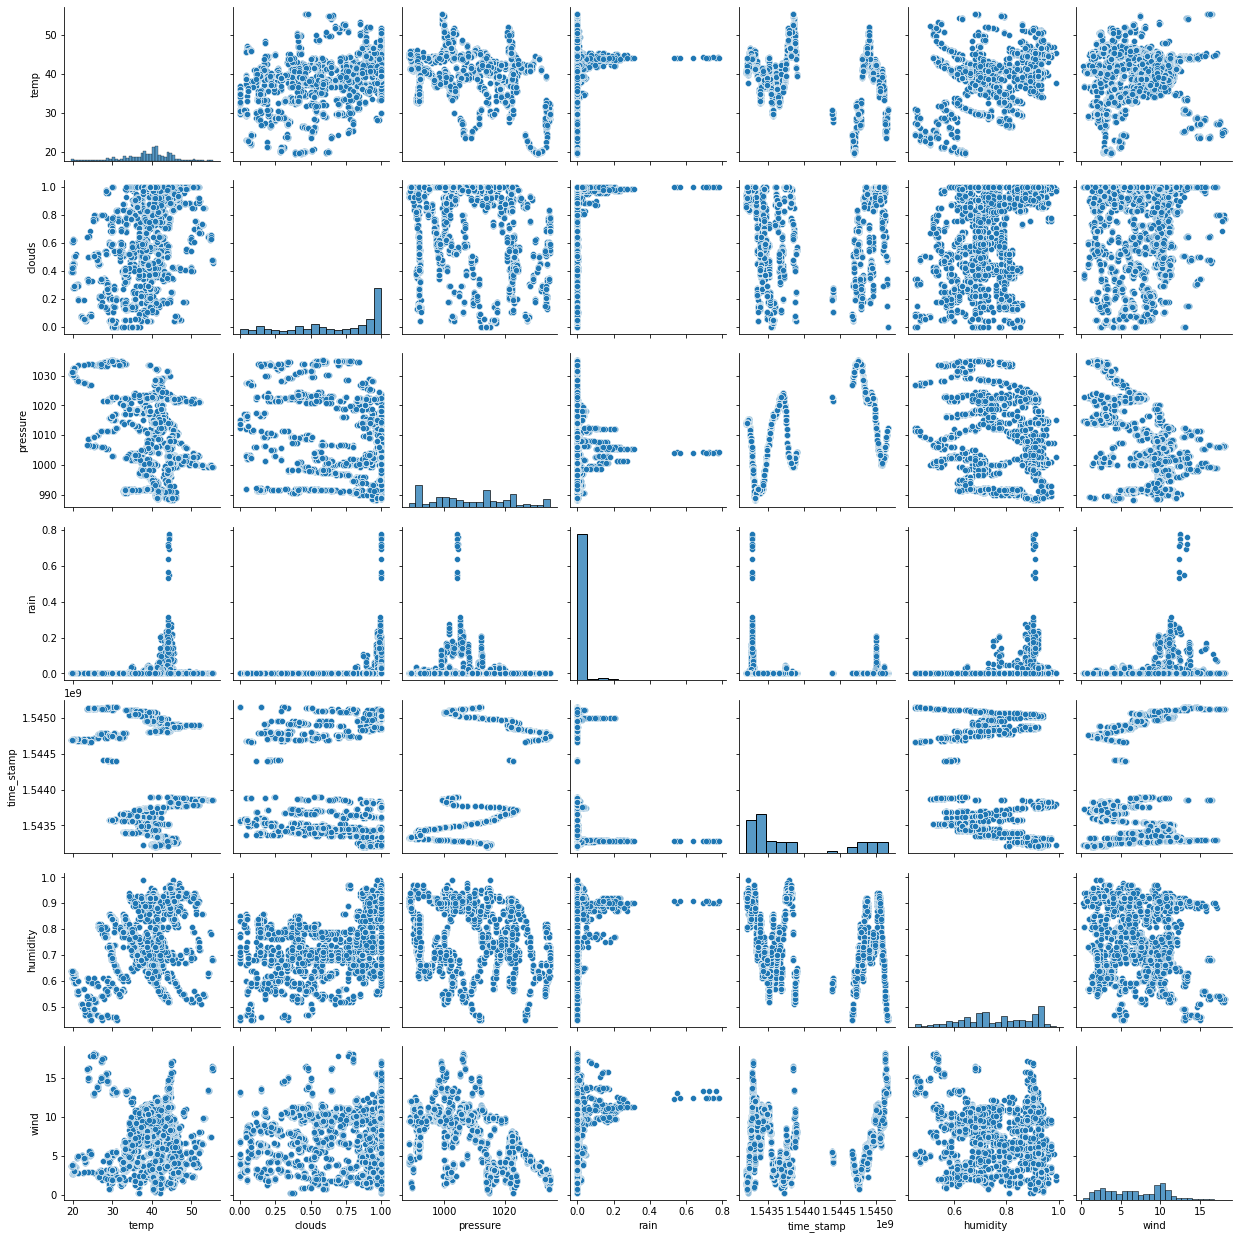

In [48]:
import seaborn as sns

sns.pairplot(df_weather)

In [45]:
import pandas as pd

df = pd.read_csv("C:/Users/tkrhk/Desktop/Online Retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010.12.1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010.12.1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010.12.1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010.12.1 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011.12.9 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011.12.9 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011.12.9 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011.12.9 12:50,4.15,12680.0,France


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
df1 = df.dropna(axis = 0)

In [48]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [49]:
df_ordercount = df1.groupby('CustomerID').count()['Description']
df_ordercount

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: Description, Length: 4372, dtype: int64

In [50]:
df = pd.merge(df1, df_ordercount, on = 'CustomerID')
df = df.rename(columns = {'Description_x' : 'Description','Description_y' : 'OrderCount'})

In [51]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ordercount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 8:26,2.55,17850.0,United Kingdom,312
1,536365,71053,WHITE METAL LANTERN,6,2010.12.1 8:26,3.39,17850.0,United Kingdom,312
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010.12.1 8:26,2.75,17850.0,United Kingdom,312
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010.12.1 8:26,3.39,17850.0,United Kingdom,312
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010.12.1 8:26,3.39,17850.0,United Kingdom,312
...,...,...,...,...,...,...,...,...,...
406824,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011.12.9 12:16,1.25,12713.0,Germany,38
406825,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011.12.9 12:16,0.85,12713.0,Germany,38
406826,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011.12.9 12:16,0.85,12713.0,Germany,38
406827,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011.12.9 12:16,2.08,12713.0,Germany,38


In [52]:
df_totalsales = df.groupby('Description').count()['Country']
df_totalsales

Description
 4 PURPLE FLOCK DINNER CANDLES       39
 50'S CHRISTMAS GIFT BAG LARGE      110
 DOLLY GIRL BEAKER                  140
 I LOVE LONDON MINI BACKPACK         70
 I LOVE LONDON MINI RUCKSACK          1
                                   ... 
ZINC T-LIGHT HOLDER STARS SMALL     241
ZINC TOP  2 DOOR WOODEN SHELF        11
ZINC WILLIE WINKIE  CANDLE STICK    193
ZINC WIRE KITCHEN ORGANISER          12
ZINC WIRE SWEETHEART LETTER TRAY     20
Name: Country, Length: 3896, dtype: int64

In [53]:
df = pd.merge(df, df_totalsales, on = 'Description')
df = df.rename(columns = {'Country_x' : 'Country','Country_y' : 'TotalSales'})

In [54]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ordercount,totalsales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 8:26,2.55,17850.0,United Kingdom,312,2070
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 9:02,2.55,17850.0,United Kingdom,312,2070
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 9:32,2.55,17850.0,United Kingdom,312,2070
3,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 10:51,2.55,17850.0,United Kingdom,312,2070
4,536406,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,2010.12.1 11:33,2.55,17850.0,United Kingdom,312,2070
...,...,...,...,...,...,...,...,...,...,...
406824,580691,90214O,"LETTER ""O"" BLING KEY RING",12,2011.12.5 15:48,0.29,13790.0,United Kingdom,45,1
406825,580691,90214T,"LETTER ""T"" BLING KEY RING",12,2011.12.5 15:48,0.29,13790.0,United Kingdom,45,1
406826,580691,90214U,"LETTER ""U"" BLING KEY RING",12,2011.12.5 15:48,0.29,13790.0,United Kingdom,45,1
406827,580691,90214W,"LETTER ""W"" BLING KEY RING",12,2011.12.5 15:48,0.29,13790.0,United Kingdom,45,1


In [55]:
df['AvgOrderValue'] =df["Quantity"] * df['UnitPrice']

In [56]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ordercount,totalsales,AvgOrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 8:26,2.55,17850.0,United Kingdom,312,2070,15.30
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 9:02,2.55,17850.0,United Kingdom,312,2070,15.30
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 9:32,2.55,17850.0,United Kingdom,312,2070,15.30
3,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 10:51,2.55,17850.0,United Kingdom,312,2070,15.30
4,536406,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,2010.12.1 11:33,2.55,17850.0,United Kingdom,312,2070,20.40
...,...,...,...,...,...,...,...,...,...,...,...
406824,580691,90214O,"LETTER ""O"" BLING KEY RING",12,2011.12.5 15:48,0.29,13790.0,United Kingdom,45,1,3.48
406825,580691,90214T,"LETTER ""T"" BLING KEY RING",12,2011.12.5 15:48,0.29,13790.0,United Kingdom,45,1,3.48
406826,580691,90214U,"LETTER ""U"" BLING KEY RING",12,2011.12.5 15:48,0.29,13790.0,United Kingdom,45,1,3.48
406827,580691,90214W,"LETTER ""W"" BLING KEY RING",12,2011.12.5 15:48,0.29,13790.0,United Kingdom,45,1,3.48


In [68]:
df_features = df.iloc[:,-9:] 

,Description,CustomerID,ordercount,totalsales,AvgOrderValue
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,312,2070,15.30
1,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,312,2070,15.30
2,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,312,2070,15.30
3,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,312,2070,15.30
4,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,312,2070,20.40
...,...,...,...,...,...
406824,"LETTER ""O"" BLING KEY RING",13790.0,45,1,3.48
406825,"LETTER ""T"" BLING KEY RING",13790.0,45,1,3.48
406826,"LETTER ""U"" BLING KEY RING",13790.0,45,1,3.48
406827,"LETTER ""W"" BLING KEY RING",13790.0,45,1,3.48


In [71]:
df_features.describe()

,CustomerID,ordercount,totalsales,AvgOrderValue
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,15287.690570,673.695688,355.042126,20.401854
std,1713.600303,1471.805936,336.403696,427.591718
min,12346.000000,1.000000,1.000000,-168469.600000
25%,13953.000000,92.000000,124.000000,4.200000
50%,15152.000000,206.000000,253.000000,11.100000
75%,16791.000000,452.000000,481.000000,19.500000
max,18287.000000,7983.000000,2070.000000,168469.600000


In [70]:
df_features.drop(df['AvgOrderValue'] == 0, axis = 1)

KeyError: '[False False False ... False False False] not found in axis'